In [7]:
# Load a DEM of Poland (30m) sourced from the EU-DEM
# https://www.eea.europa.eu/data-and-maps/data/copernicus-land-monitoring-service-eu-dem

with rasterio.open('../../neilpy_data/poland_30m.tif') as src:
    Z = src.read(1)
    Zt = src.affine
Z[Z==src.nodata] = np.nan

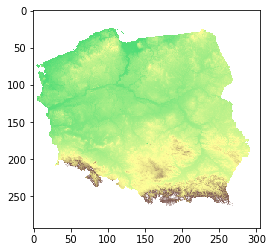

In [8]:
# Show a hysometric tint
plt.imshow(Z[::100,::100],cmap='terrain',vmin=-500,vmax=1000)
plt.show()

In [10]:
# Because of the large file size, Geomorphons are calculated using a moving window approach

cellsize = Zt[0]
lookup_pixels = 50
threshold_angle = 1
def gm_wrap(I):
    this_G = neilpy.get_geomorphons(I,cellsize,lookup_pixels,threshold_angle)
    return this_G
G = apply_parallel(gm_wrap,Z.copy(),1000,lookup_pixels)

C:\Anaconda3\lib\site-packages\neilpy\neilpy.py:499: RuntimeWarning: invalid value encountered in less
  this_layer[these_angles < this_layer] = these_angles[these_angles < this_layer]
C:\Anaconda3\lib\site-packages\neilpy\neilpy.py:530: RuntimeWarning: invalid value encountered in subtract
  O = O - openness(-Z,cellsize,lookup_pixels,neighbors=np.array([i]))
C:\Anaconda3\lib\site-packages\neilpy\neilpy.py:534: RuntimeWarning: invalid value encountered in greater
  tempMat[O > threshold_angle] = 2;
C:\Anaconda3\lib\site-packages\neilpy\neilpy.py:535: RuntimeWarning: invalid value encountered in less
  tempMat[O < -threshold_angle] = 0;


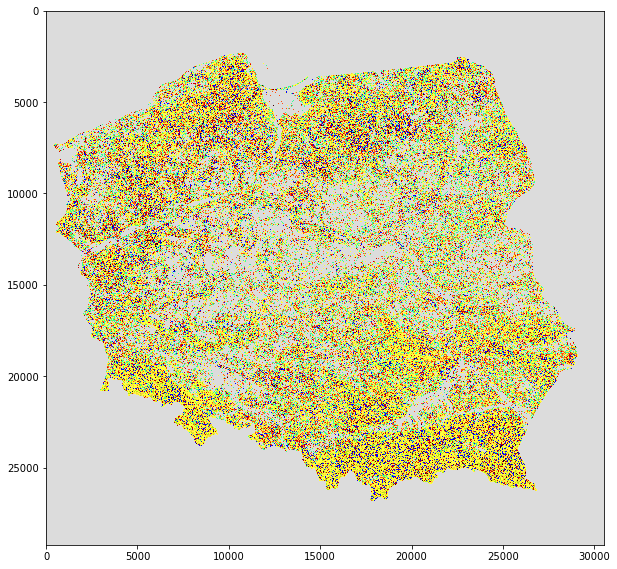

In [15]:
# Apply a "standard" colormap and display the image
plt.figure(figsize=(10,10))
im = Image.fromarray(G,mode='L')
im.putpalette(neilpy.geomorphon_cmap())
plt.imshow(im)
plt.show()
im.save('../../neilpy_data/poland_geomorphon.png')

In [16]:
# And write the world file.

neilpy.write_worldfile(Zt,'../../neilpy_data/poland_geomorphon.pgw')